In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker
import h5py
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


<ipython-input-1-3030ac777b9d>:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [44]:
qc_test_e = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/QC_ch2o/QC_formaldehyde_stw_e.dat", dtype=None)
qc_test_pp = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/QC_ch2o/QC_formaldehyde_stw_pe.dat", dtype=None)
qc_test_pe = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/QC_ch2o/QC_formaldehyde_stw_pp.dat", dtype=None)

coh2_smtd_e = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/coh2/Data/coh2_smt_e.dat", dtype=None)
coh2_smtd_pe = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/coh2/Data/coh2_smt_pe.dat", dtype=None)
coh2_smtd_pp = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/coh2/Data/coh2_smt_pp.dat", dtype=None)

test_e = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/debug/test_e.dat", dtype=None)
test_de = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/debug/test_de.dat", dtype=None)
test_pe = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/debug/test_pe.dat", dtype=None)
test_pp = np.loadtxt("/Users/aodongliu/LiGroup/for_mathew/debug/test_pp.dat", dtype=None)

In [45]:
test_iter = np.arange(1,test_e.size,1)
test_iter2 = np.arange(1,test_pe.size,1)
coh2_smtd_iter = np.arange(1,coh2_smtd_e.size,1)
qc_test_iter = np.arange(1,qc_test_e.size,1)

# Subtract the final energy for energy at each iteration
test_e -= test_e[-1]
coh2_smtd_e -= coh2_smtd_e[-1]
qc_test_e -= qc_test_e[-1]

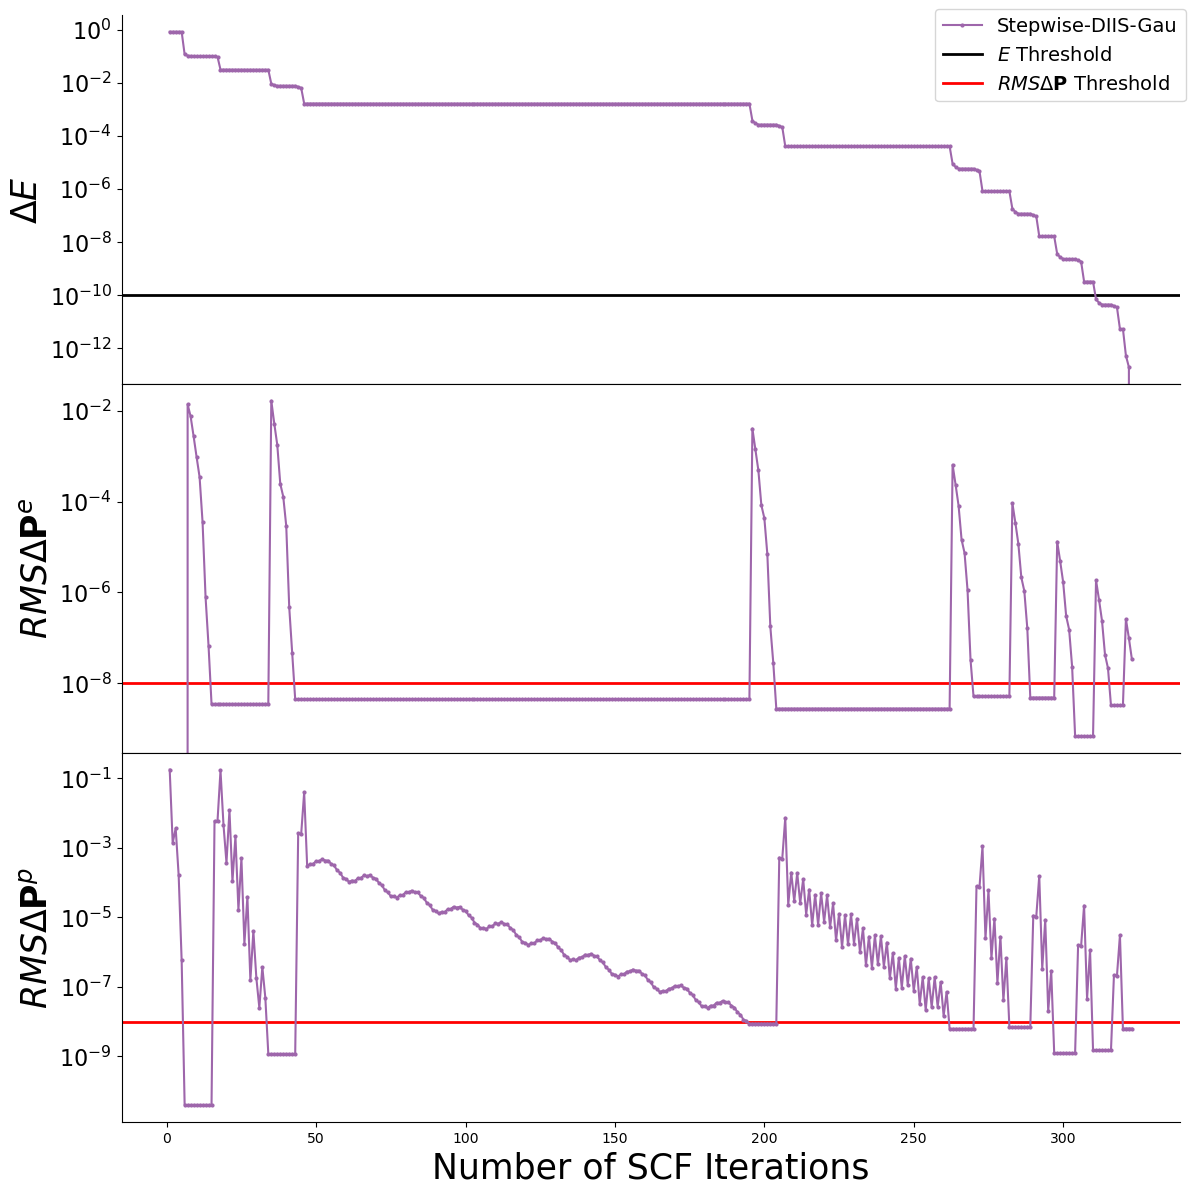

In [47]:
plt.style.use('default')
fig, ax = plt.subplots(3, 1,figsize =(12, 12), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)
#ax[0].plot(coh2_smtd_iter,coh2_smtd_e[1:],'o-',c='darkorange',ms=2,label="Simultaneous-DIIS-Gau")
ax[0].plot(test_iter,test_e[1:],'o-',c='#9e66ab',ms=2,label="Stepwise-DIIS-Gau")
#ax[0].plot(qc_test_iter,qc_test_e[1:],'o-',c='#599ad3',ms=2,label="Stepwise-DIIS-QC")
ax[0].axhline(y=10**(-10),xmin=0,xmax=test_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$ \Delta E}$",fontsize=25)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#ax[1].plot(coh2_smtd_iter,coh2_smtd_pe[1:],'o-',c='darkorange',ms=2)
ax[1].plot(test_iter2,test_pe[1:],'o-',c='#9e66ab',ms=2)
#ax[1].plot(qc_test_iter,qc_test_pe[1:],'o-',c='#599ad3',ms=2)
ax[1].axhline(y=10**(-8),xmin=0,xmax=test_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMS \Delta \mathbf{P} $ Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMS \Delta \mathbf{P} ^e$",fontsize=25)
ax[1].spines['right'].set_visible(False)

#ax[2].plot(coh2_smtd_iter,coh2_smtd_pp[1:],'o-',c='darkorange',ms=2)
ax[2].plot(test_iter2,test_pp[1:],'o-',c='#9e66ab',ms=2)
#ax[2].plot(qc_test_iter,qc_test_pp[1:],'o-',c='#599ad3',ms=2)
ax[2].axhline(y=10**(-8),xmin=0,xmax=test_iter.size+1,c="red",linewidth=2,zorder=0)
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMS \Delta \mathbf{P} ^p$",fontsize=25)
ax[2].set_xlabel("Number of SCF Iterations", fontsize=25)
ax[2].spines['right'].set_visible(False)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)
# # Hide x labels and tick labels for all but bottom plot.
# for axes in ax:
#    axes.label_outer()

fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,fontsize=14,loc='upper right')

plt.tight_layout()
plt.savefig('../plots/test.pdf', dpi=3600)

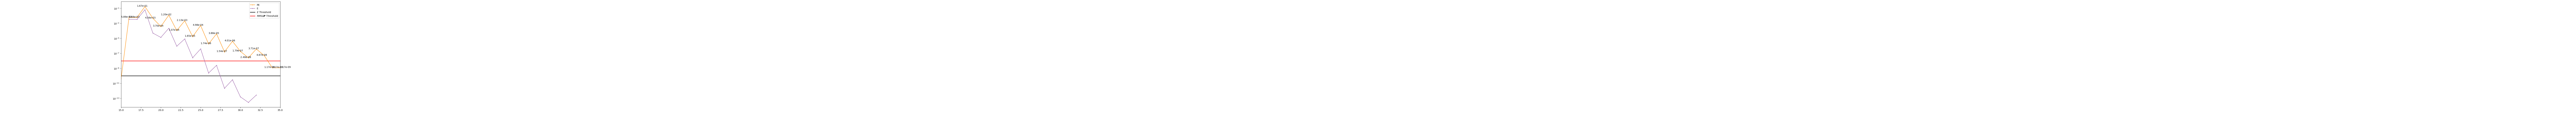

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(test_iter2,test_pp[1:],'o-',c='darkorange',ms=2,label="PE")
for i, f1 in enumerate(test_pp[1:]):
    ax.annotate('{:0.2e}'.format(f1), (i, f1))
plt.plot(test_iter[15:32],abs(test_de[1:][15:32]),'o-',c='#9e66ab',ms=2,label="E")
plt.axhline(y=10**(-10),xmin=0,xmax=test_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
plt.axhline(y=10**(-8),xmin=0,xmax=test_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMS \Delta \mathbf{P} $ Threshold')
plt.xlim(15,35)
plt.yscale("log")
plt.legend()
plt.savefig('../plots/test_zoomin.pdf', dpi=3600)

In [28]:
test_pp[16:35]

array([5.88875166e-03, 5.87547460e-03, 1.66718692e-01, 4.56269353e-03,
       3.70211913e-04, 1.19506280e-02, 1.06958861e-04, 2.12998622e-03,
       1.64509381e-05, 4.98218887e-04, 1.73919227e-06, 3.88123708e-05,
       1.53647604e-07, 4.00524648e-06, 1.79376523e-07, 2.48412510e-08,
       3.70833105e-07, 4.87432730e-08, 1.17012658e-09])

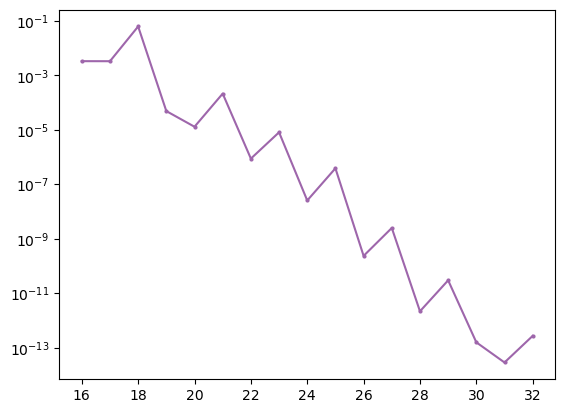

In [83]:
plt.plot(test_iter[15:32],abs(test_de[1:][15:32]),'o-',c='#9e66ab',ms=2,label="E")
plt.yscale("log")

In [56]:
test_de[16:34]

array([-3.33831438e-03, -3.32688454e-03, -6.28067318e-02, -4.89048783e-05,
       -1.30200184e-05, -2.14551123e-04, -8.77864821e-07, -8.13115864e-06,
       -2.54144510e-08, -3.86621295e-07, -2.34592790e-10, -2.48577692e-09,
       -2.16004992e-12, -2.96722646e-11, -1.56319402e-13, -2.84217094e-14,
       -2.70006240e-13,  0.00000000e+00])

In [64]:
test_de[1:][13:33]

array([-1.12038363e+02, -3.33831438e-03, -3.32688454e-03, -6.28067318e-02,
       -4.89048783e-05, -1.30200184e-05, -2.14551123e-04, -8.77864821e-07,
       -8.13115864e-06, -2.54144510e-08, -3.86621295e-07, -2.34592790e-10,
       -2.48577692e-09, -2.16004992e-12, -2.96722646e-11, -1.56319402e-13,
       -2.84217094e-14, -2.70006240e-13,  0.00000000e+00])

In [74]:
test_iter[15:32]

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [78]:
test_de[1:][15:32]

array([-3.33831438e-03, -3.32688454e-03, -6.28067318e-02, -4.89048783e-05,
       -1.30200184e-05, -2.14551123e-04, -8.77864821e-07, -8.13115864e-06,
       -2.54144510e-08, -3.86621295e-07, -2.34592790e-10, -2.48577692e-09,
       -2.16004992e-12, -2.96722646e-11, -1.56319402e-13, -2.84217094e-14,
       -2.70006240e-13])